# MACHINE LEARNING MODEL BY AURANGZEB ALAM

In [1]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#Set the working directory
os.chdir("C:/Users/auran/Desktop/Ayushi")

In [3]:
#check the working directory
os.getcwd()

'C:\\Users\\auran\\Desktop\\Ayushi'

# Exploratory Data Analysis

In [4]:
#Load the Data
Dataset = pd.read_csv("churnModelBase_Assignment2.csv")

In [5]:
#Dataset head
Dataset.head()

,userID,Contact_ind,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,...,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m,targetid
0,1,1,4,221,1,2,50.000000,33.333333,0,153,...,0.0,497.00,0.000000,0.000000,497.00,199.00,150.00,485.00,834.00,0
1,2,1,4,1225,3,1,150.000000,90.000000,0,14,...,245.0,345.00,270.325203,192.196532,1255.00,839.00,245.00,345.00,1429.00,0
2,3,1,3,838,18,19,120.000000,174.193548,724,47,...,15000.0,13782.57,23.331778,25.392551,32282.57,16730.64,15559.52,11196.57,43486.73,0
3,4,1,4,486,2,0,200.000000,200.000000,0,3,...,0.0,0.00,26400.000000,26400.000000,264.00,302.00,0.00,0.00,302.00,0
4,5,1,3,928,1,1,33.333333,37.500000,0,147,...,0.0,10.00,0.000000,0.000000,10.00,400.00,0.00,577.00,977.00,0


In [6]:
# Separate the target variable from the Dataset
y = Dataset.iloc[:,-1:]
y["targetid"].unique()

array([0, 1], dtype=int64)

In [7]:
#Shape of the Data
Dataset.shape

(50000, 112)

In [8]:
#Columns of Dataset
Dataset.columns

Index(['userID', 'Contact_ind', 'Customer_status', 'ActiveSinceDays',
       'num_AcD_m0', 'num_AcD_m1', 'r_AcD_m0_m12', 'r_AcD_m0_m123',
       'daystofirstload', 'dayssincelastload',
       ...
       'InAllRev_m1', 'InAllRev_m2', 'r_InAllRev_m0_m1', 'r_InAllRev_m0_m2',
       'tot_InAllRev_3m', 'OgAllRev_m0', 'OgAllRev_m1', 'OgAllRev_m2',
       'tot_OgAllRev_3m', 'targetid'],
      dtype='object', length=112)

In [9]:
# UserID has no use in the Dataset for any prediction so we will drop it
Dataset.drop(["userID"],axis=1, inplace=True)

In [10]:
#Numerical columns of the Dataset
numerical_column = Dataset.select_dtypes(include=[np.number]).columns.tolist()
numerical_column

['Contact_ind',
 'Customer_status',
 'ActiveSinceDays',
 'num_AcD_m0',
 'num_AcD_m1',
 'r_AcD_m0_m12',
 'r_AcD_m0_m123',
 'daystofirstload',
 'dayssincelastload',
 'tot_RevUo_m0',
 'tot_RevUo_m1',
 'tot_RevUo_m2',
 'r_tot_RevUo_m0_m1',
 'r_tot_RevUo_m1_m2',
 'r_tot_RevUo_m0_m12',
 'avg_RevUo_m0',
 'avg_RevUo_m1',
 'avg_RevUo_m2',
 'chg_RevUo_l0_1m',
 'chg_RevUo_l1_2m',
 'chg_RevUo_l2_3m',
 'tot_LdCnt_m0',
 'tot_LdCnt_m1',
 'tot_LdCnt_m2',
 'max_RevUo_m0',
 'max_RevUo_m1',
 'max_RevUo_m2',
 'r_avg_RevUo_m0_m1',
 'r_avg_RevUo_m1_m2',
 'avgdays_btw_loads_l6',
 'tot_failed_LdTxnCnt_3m',
 'r_failed_LdTxnCnt_m0_m12',
 'tot_rtlX_m0',
 'tot_rtlX_m1',
 'tot_rtlX_m2',
 'r_tot_rtlX_m0_m1',
 'r_tot_rtlX_m1_m2',
 'r_tot_rtlX_m0_m12',
 'avg_rtlX_m0',
 'avg_rtlX_m1',
 'avg_rtlX_m2',
 'max_rtlX_m0',
 'max_rtlX_m1',
 'max_rtlX_m2',
 'r_avg_max_rtlX_m0',
 'r_avg_max_rtlX_m1',
 'r_avg_max_rtlX_m2',
 'RtlTxns_cnt_m0',
 'RtlTxns_cnt_m1',
 'RtlTxns_cnt_m2',
 'r_RtlTxns_cnt_m0_m1',
 'r_RtlTxns_cnt_m1_m2',
 '

In [11]:
#Categorical columns of the Dataset
categorical_column = Dataset.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_column

[]

In [12]:
#Dataset info of the Dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 111 entries, Contact_ind to targetid
dtypes: float64(67), int64(44)
memory usage: 42.3 MB


In [13]:
#Statistical Description of the Dataset
Dataset.describe()

,Contact_ind,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,tot_RevUo_m0,...,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m,targetid
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,...,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,0.888900,2.822120,713.390560,4.386800,4.59760,112.890128,118.800457,135.529600,30.789600,2.461531e+03,...,2703.132630,2386.290340,4.985664e+04,6.558467e+04,7.872779e+03,3.388236e+03,3167.911153,2811.217676,9.367364e+03,0.203500
std,0.314259,15.547017,527.984288,3.855557,4.18118,107.234056,103.332503,398.592531,183.071121,1.056847e+04,...,10074.592506,7119.815625,4.699331e+05,6.138574e+05,2.379699e+04,1.252069e+04,10563.659045,8130.048248,2.692835e+04,0.402605
min,0.000000,-999.000000,-999.000000,1.000000,0.00000,4.444444,4.285714,-999.000000,-999.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,0.000000,0.000000,1.000000e+00,0.000000
25%,1.000000,3.000000,261.000000,2.000000,2.00000,55.555556,60.000000,0.000000,9.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,5.000000e+02,2.800000e+02,199.000000,100.000000,1.168000e+03,0.000000
50%,1.000000,3.000000,551.000000,3.000000,3.00000,88.888889,96.000000,3.000000,39.000000,2.000000e+02,...,300.000000,407.000000,3.332973e+01,3.251484e+01,1.726000e+03,7.475800e+02,731.000000,624.000000,2.801000e+03,0.000000
75%,1.000000,4.000000,1081.000000,6.000000,6.00000,133.333333,150.000000,156.000000,94.000000,1.310000e+03,...,1600.000000,1728.812500,2.040013e+02,2.278268e+02,6.326872e+03,2.403000e+03,2388.000000,2300.000000,8.607000e+03,0.000000
max,1.000000,4.000000,2999.000000,30.000000,31.00000,4600.000000,3450.000000,2569.000000,246.000000,1.056800e+06,...,718900.000000,556440.000000,3.431150e+07,6.506785e+07,2.342540e+06,1.152048e+06,760763.250000,703016.000000,2.577306e+06,1.000000


# Missing Value

In [14]:
#Total number of missing value in the Dataset
z = 0
for i in Dataset.columns:
    z += Dataset[i].isnull().sum()
print(z)

68650


In [15]:
Dataset.dtypes

Contact_ind                   int64
Customer_status               int64
ActiveSinceDays               int64
num_AcD_m0                    int64
num_AcD_m1                    int64
r_AcD_m0_m12                float64
r_AcD_m0_m123               float64
daystofirstload               int64
dayssincelastload             int64
tot_RevUo_m0                float64
tot_RevUo_m1                float64
tot_RevUo_m2                float64
r_tot_RevUo_m0_m1           float64
r_tot_RevUo_m1_m2           float64
r_tot_RevUo_m0_m12          float64
avg_RevUo_m0                float64
avg_RevUo_m1                float64
avg_RevUo_m2                float64
chg_RevUo_l0_1m             float64
chg_RevUo_l1_2m             float64
chg_RevUo_l2_3m             float64
tot_LdCnt_m0                  int64
tot_LdCnt_m1                  int64
tot_LdCnt_m2                  int64
max_RevUo_m0                float64
max_RevUo_m1                float64
max_RevUo_m2                float64
r_avg_RevUo_m0_m1           

In [16]:
# Now lets impute the missing values with mean and most_frequent

from sklearn.preprocessing import Imputer

for i in Dataset.columns:
    if(Dataset[i].dtypes=='float64'):
        imputer = Imputer(missing_values="NaN",strategy='mean',axis=0)
        Dataset[[i]] = imputer.fit_transform(Dataset[[i]])
    else:
        imputer = Imputer(missing_values="NaN",strategy='most_frequent',axis=0)
        Dataset[[i]] = imputer.fit_transform(Dataset[[i]])

In [17]:
#Check the missing values after imputation
Dataset.isnull().sum().sum()

0

# Outliers

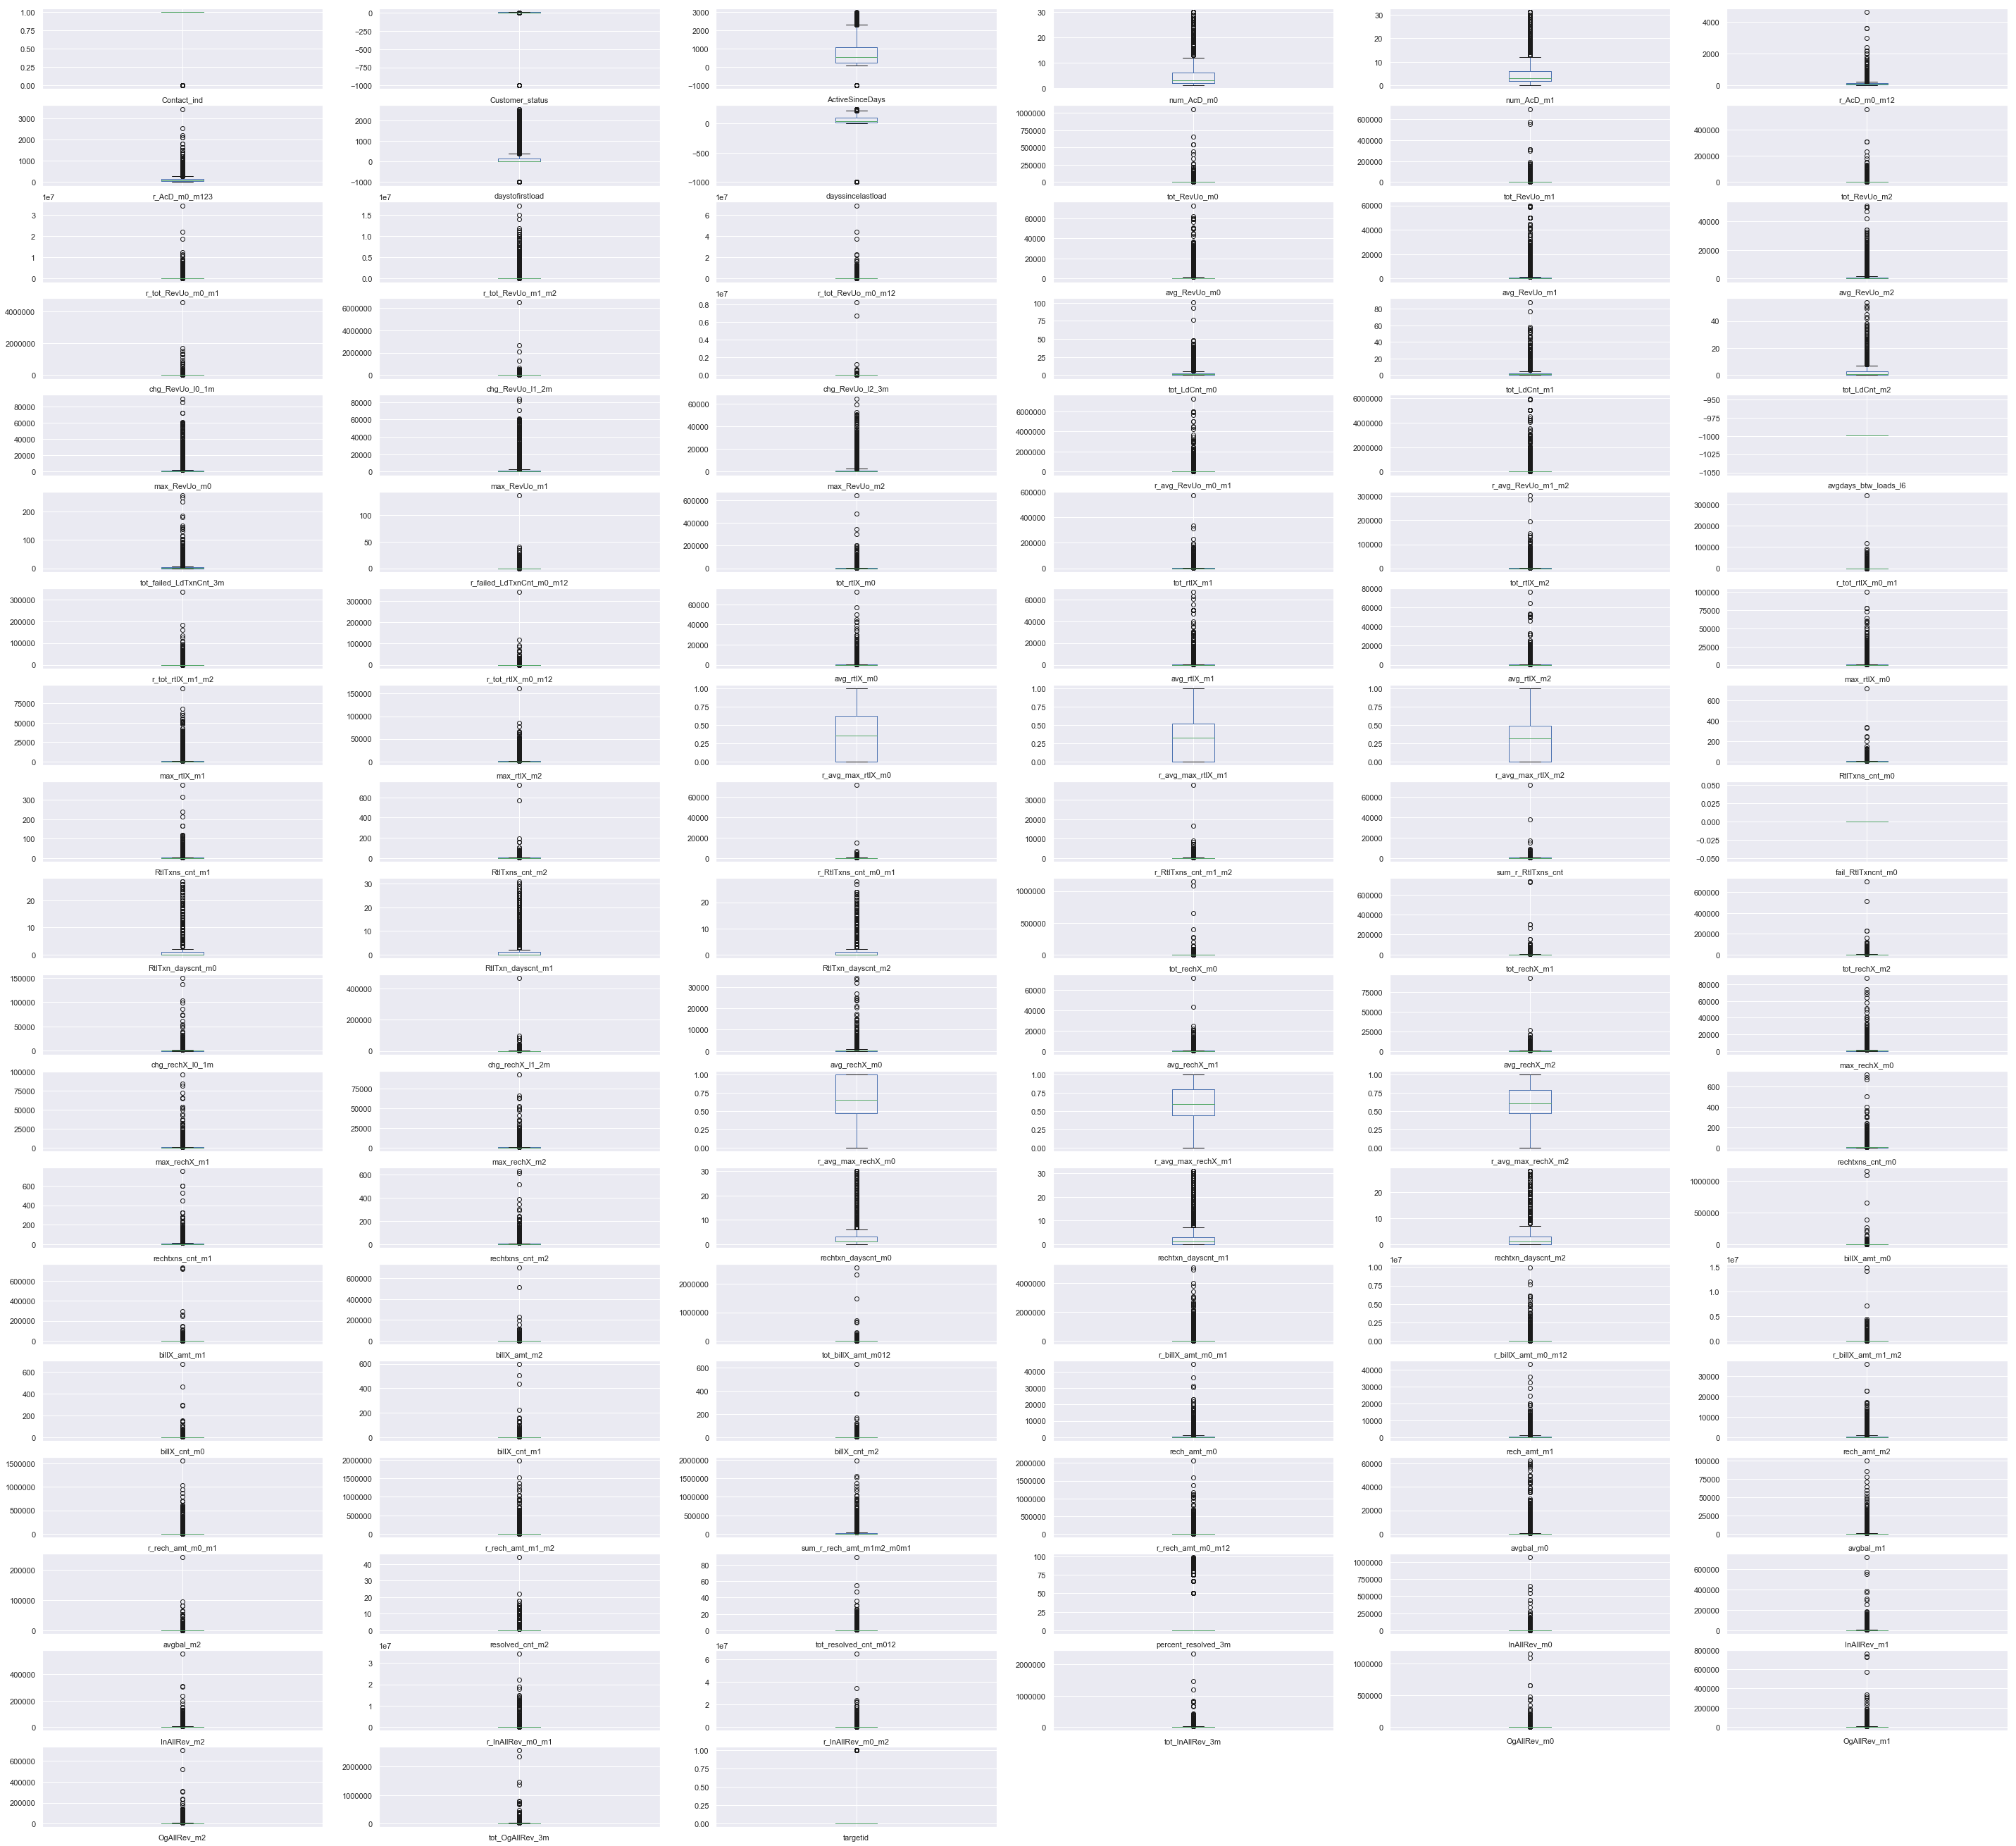

In [18]:
#Plot to see the outliers
Dataset.plot(kind="box",subplots=True,layout=(20,6),figsize=(50,50))
plt.show()

In [19]:
#Detect the outliers and make those outliers as NaN value.
for i in numerical_column:
    print(i)
    q75,q25=np.percentile(Dataset[i],[75,25])
    iqr = q75-q25
    min = q25-(iqr*1.5)
    print(min)
    max = q75+(iqr*1.5)
    print(max)
    Dataset.loc[Dataset[i]<min,i] = np.nan
    Dataset.loc[Dataset[i]>max,i] = np.nan

Contact_ind
1.0
1.0
Customer_status
1.5
5.5
ActiveSinceDays
-969.0
2311.0
num_AcD_m0
-4.0
12.0
num_AcD_m1
-4.0
12.0
r_AcD_m0_m12
-61.11111104999999
249.99999990999999
r_AcD_m0_m123
-75.0
285.0
daystofirstload
-234.0
390.0
dayssincelastload
-118.5
221.5
tot_RevUo_m0
-1965.0
3275.0
tot_RevUo_m1
-2250.0
3750.0
tot_RevUo_m2
-2325.0
3875.0
r_tot_RevUo_m0_m1
-299.850075
499.750125
r_tot_RevUo_m1_m2
-364.10234204999995
606.8372367499999
r_tot_RevUo_m0_m12
-221.2203960375
368.7006600625
avg_RevUo_m0
-903.9740625
1506.6234375
avg_RevUo_m1
-937.5
1562.5
avg_RevUo_m2
-945.23625
1575.3937500000002
chg_RevUo_l0_1m
-2457.72464067
1432.20773445
chg_RevUo_l1_2m
-2467.5
1448.5
chg_RevUo_l2_3m
-2468.1657056024997
1449.6095093375
tot_LdCnt_m0
-3.0
5.0
tot_LdCnt_m1
-3.0
5.0
tot_LdCnt_m2
-4.5
7.5
max_RevUo_m0
-1500.0
2500.0
max_RevUo_m1
-1500.0
2500.0
max_RevUo_m2
-1500.0
2500.0
r_avg_RevUo_m0_m1
-268.45280921250003
447.42134868750003
r_avg_RevUo_m1_m2
-299.40119760000005
499.0019960000001
avgdays_btw_load

In [20]:
#Now check the total number of NaN which has been created after outliers detection.
Dataset.isnull().sum().sum()

596519

In [21]:
# Again impute the NaN value which was created after we made outliers as NaN by mean and most_frequent

for i in Dataset.columns:
    if(Dataset[i].dtypes=='float64'):
        imputer = Imputer(missing_values="NaN",strategy='mean',axis=0)
        Dataset[[i]] = imputer.fit_transform(Dataset[[i]])
    else:
        imputer = Imputer(missing_values="NaN",strategy='most_frequent',axis=0)
        Dataset[[i]] = imputer.fit_transform(Dataset[[i]])

In [22]:
#Now check the null after we did the imputation
Dataset.isnull().sum().sum()

0

# Feature Selection

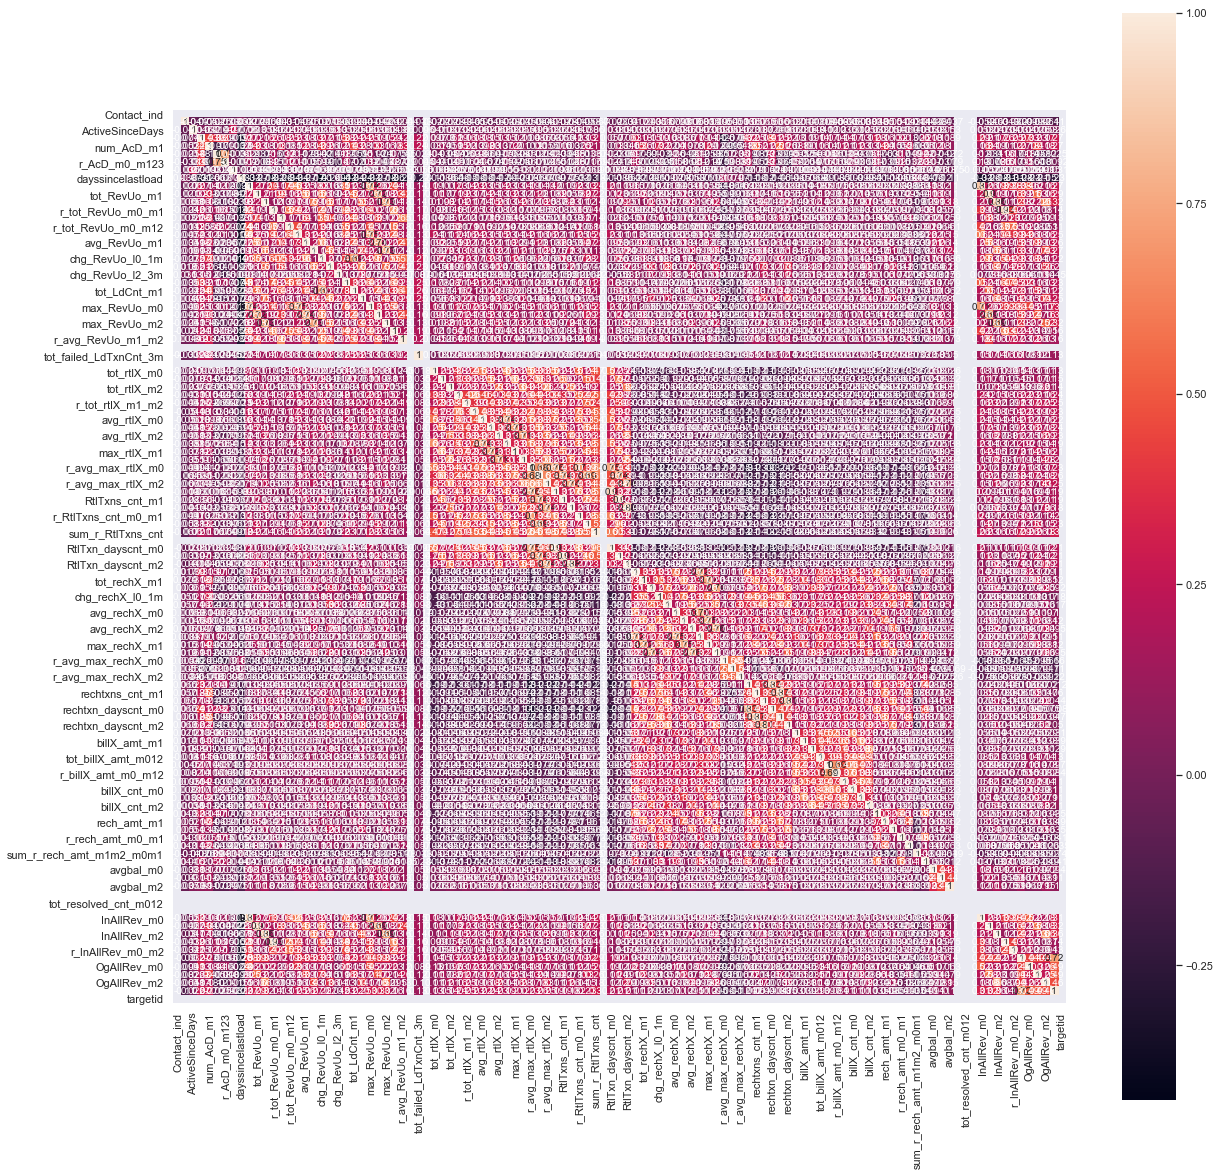

In [23]:
#Firstly create the correlation and then plot the correlation matrix
corr = Dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, square=True)

In [24]:
# Create correlation matrix and remove the correlated columns
corr_matrix = Dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
Dataset.drop(Dataset[to_drop], axis=1,inplace=True)

In [25]:
#After finding and removing the correlated columns we will define the predictor variables that is
X = Dataset

In [26]:
#Now split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Build the model

# Logistic Regression

In [27]:
#Import Logistic Regression and initiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train,y_train)
prediction1 = Logistic_Regression.predict(X_test)

C:\Users\auran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#Accuracy metrics
from sklearn import metrics
print("accuracy_score",metrics.accuracy_score(prediction1,y_test))

accuracy_score 0.8220666666666666


# Random Forest

In [29]:
#Import Random Forest and initiate the Random Forest model
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(n_estimators=200)
Random_Forest.fit(X_train,y_train)

C:\Users\auran\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\auran\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
prediction2 = Random_Forest.predict(X_test)
prediction2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn import metrics
metrics.accuracy_score(prediction2,y_test)

0.8517333333333333